In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import covid
import covid.util as util
import configs

In [29]:
data = util.load_data()

forecast_date='2020-04-25'
config_name = 'strongest_prior'
root='results'
place='PA'
show=True

prefix = f"{root}/{config_name}/{forecast_date}"
config = getattr(configs, config_name)
model_type=config['model']

df = util.score_place(forecast_date,
                      data,
                      place,
                      model_type=config['model'],
                      prefix=prefix)


display(df)

,place,forecast_date,horizon,err,log_score,quantile
date,,,,,,
2020-04-26,PA,2020-04-25,1.0,-239.871338,-2.207275,0.020
2020-04-27,PA,2020-04-25,2.0,-301.446289,-2.7181005,0.015
2020-04-28,PA,2020-04-25,3.0,-276.181885,-1.9732814,0.046
2020-04-29,PA,2020-04-25,4.0,-83.557617,-1.0966144,0.358
2020-04-30,PA,2020-04-25,5.0,-121.163574,-1.258781,0.328
2020-05-01,PA,2020-04-25,6.0,-99.429688,-1.3862944,0.386
2020-05-02,PA,2020-04-25,7.0,-173.559814,-1.469676,0.314
2020-05-03,PA,2020-04-25,8.0,-286.894531,-1.6820086,0.231
2020-05-04,PA,2020-04-25,9.0,-309.776855,-1.7778566,0.243


In [67]:
data = util.load_state_data()
root='results'
config_name = 'strongest_prior'
forecast_date = '2020-04-11'

prefix = f"{root}/{config_name}/{forecast_date}"

summary, details = util.score_forecast(forecast_date,
                                       data, 
                                       model_type=covid.models.SEIRD.SEIRD,
                                       prefix=prefix)

display(summary)

  0%|          | 0/51 [00:00<?, ?it/s]

Scoring all places for 2020-04-11 forecast


100%|██████████| 51/51 [00:21<00:00,  2.35it/s]


,horizon,MAE,log_score,KS,KS_pval
date,,,,,
2020-04-12,1.0,18.753689,-0.096269,0.253098,2.289567e-03
2020-04-13,2.0,33.999981,-0.167083,0.387490,2.100602e-07
2020-04-14,3.0,40.485164,-0.203100,0.354922,2.969483e-06
2020-04-15,4.0,48.554786,-0.254331,0.322137,3.288138e-05
2020-04-16,5.0,66.216487,-0.324995,0.279235,5.219381e-04
2020-04-17,6.0,76.104889,-0.389822,0.275706,6.430258e-04
2020-04-18,7.0,94.947741,-0.471138,0.312490,6.354754e-05
2020-04-19,8.0,134.989218,-0.557475,0.338882,9.944158e-06
2020-04-20,9.0,170.356189,-0.644781,0.361137,1.827935e-06


In [56]:
eval_date = '2020-05-07'
row = summary.loc[eval_date].astype(str).values #.flatten().tolist()
print(','.join(row))


12.0,117.06207019207524,-0.8319913078756893,0.11284313725490197,0.5071072118349441


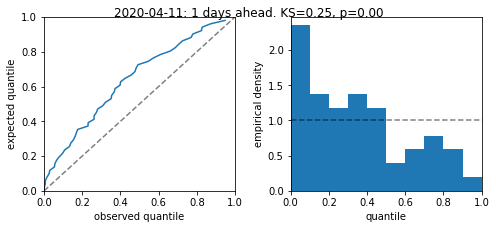

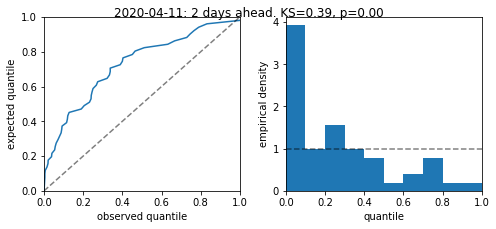

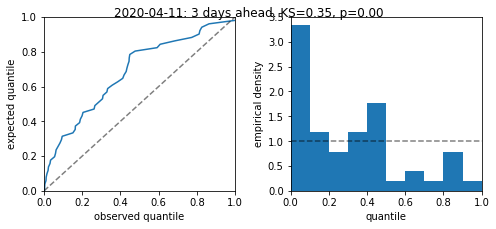

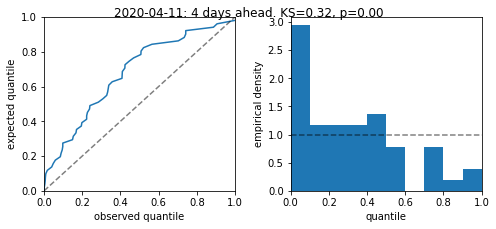

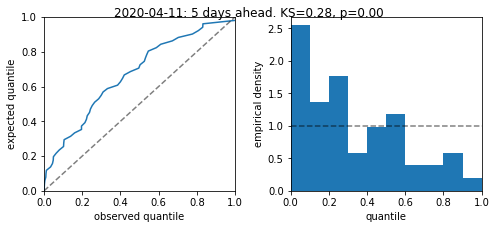

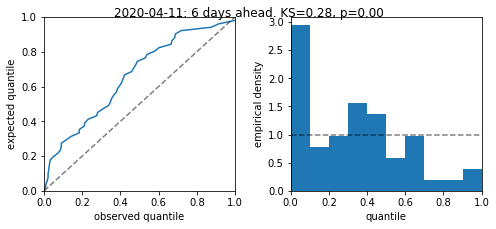

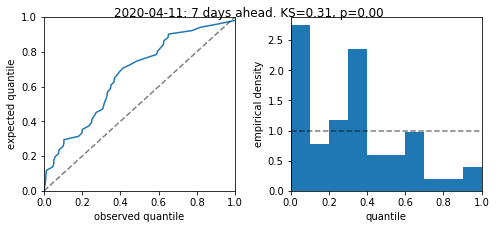

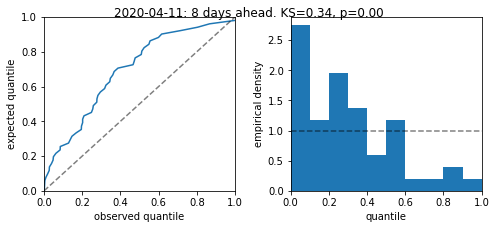

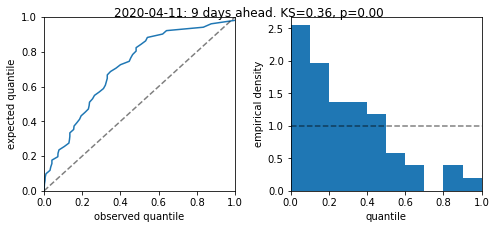

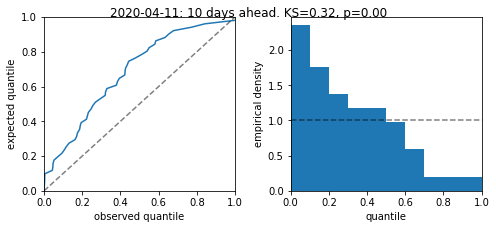

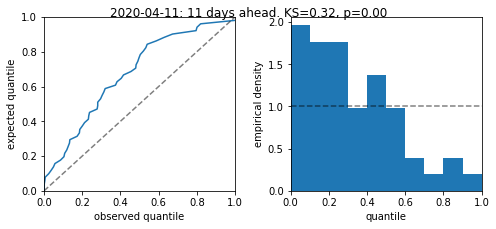

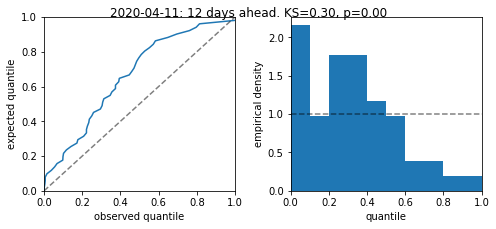

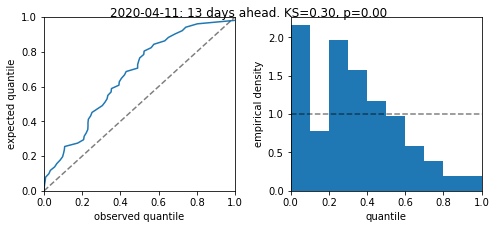

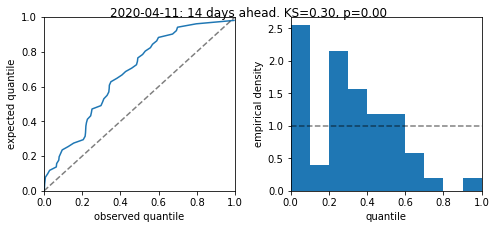

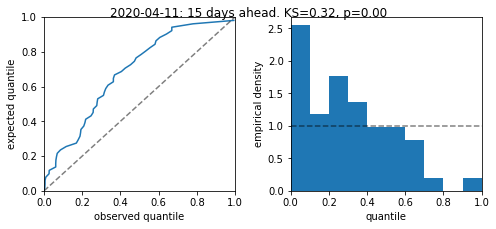

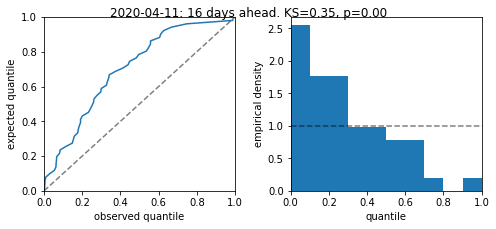

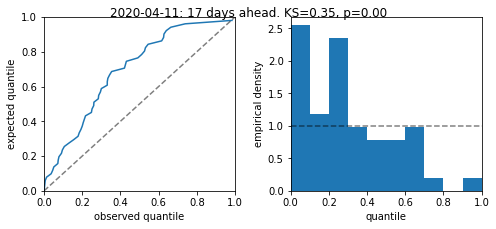

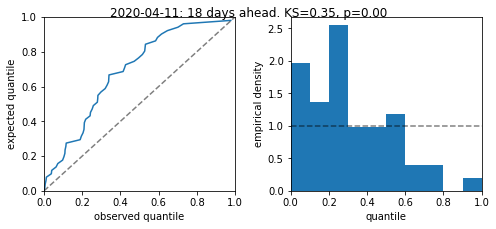

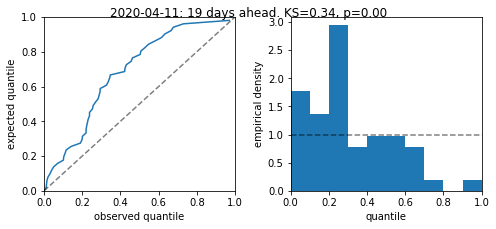

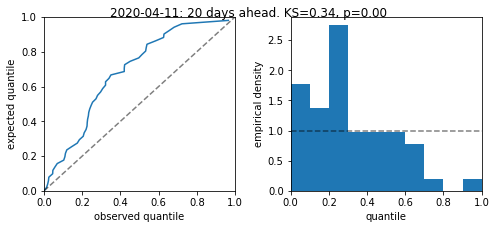

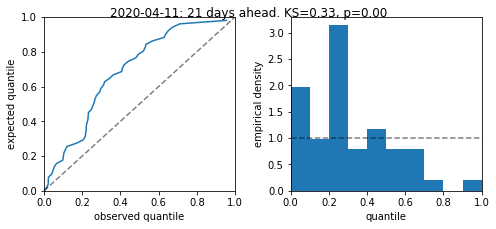

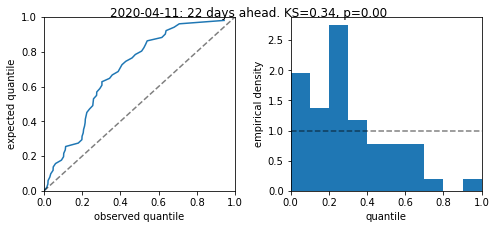

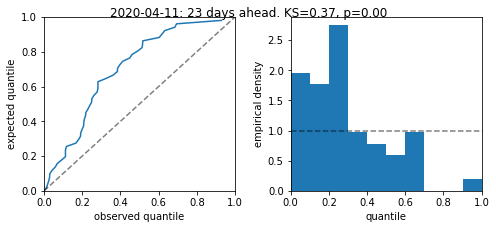

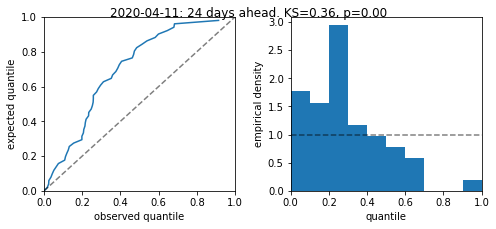

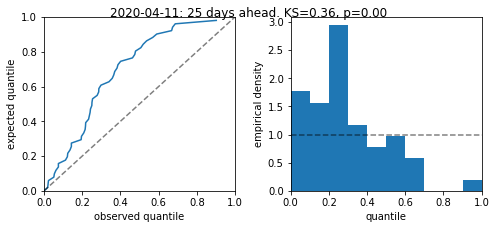

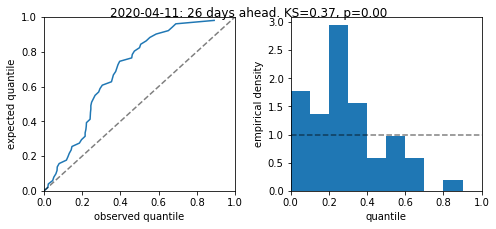

In [68]:
import scipy.stats

qq = False
df = details
for date in df.index.unique():

    fig, axes = plt.subplots(figsize=(7,3.2), ncols=2)
    
    q = np.sort(df.loc[date]['quantile'])
    q_ref = np.arange(len(q))/len(q)
    ks, pval = scipy.stats.kstest(q, 'uniform')

    horizon = int((date-pd.to_datetime(forecast_date))/pd.Timedelta("1d"))

    ax = axes[0]
    ax.plot(q, q_ref)
    ax.plot([0., 1.], [0., 1.], linestyle='--', color='k', alpha=0.5)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('observed quantile')
    ax.set_ylabel('expected quantile')

    ax = axes[1]
    ax.hist(q, bins=10, range=(0., 1.), density=True)
    ax.set_xlim([0, 1])
    ax.plot([0, 1], [1, 1], linestyle='--', color='k', alpha=0.5)
    ax.set_xlabel('quantile')
    ax.set_ylabel('empirical density')
    
    
    plt.suptitle(f"{forecast_date}: {horizon} days ahead. KS={ks:.2f}, p={pval:.2f}")
    
    plt.tight_layout()
    plt.show()

,foo,horizon,MAE,log_score,KS,KS_pval
date,,,,,,
2020-04-19,1,1.0,31.612854,-0.183683,0.090627,0.796321
2020-04-20,1,2.0,36.562292,-0.198416,0.149196,0.186635
2020-04-21,1,3.0,48.710736,-0.273349,0.072294,0.952565
2020-04-22,1,4.0,54.948570,-0.310423,0.100882,0.663613
2020-04-23,1,5.0,62.470313,-0.351894,0.121784,0.406806
2020-04-24,1,6.0,77.232444,-0.414256,0.116314,0.466446
2020-04-25,1,7.0,73.977722,-0.458042,0.113922,0.494239
2020-04-26,1,8.0,91.920086,-0.507871,0.126098,0.363612
2020-04-27,1,9.0,105.630039,-0.552181,0.164706,0.112019
